In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df1 = pd.read_csv("downtime-factors.csv")
df1

,Factor|Description|Operator Error
0,1|Emergency stop|No
1,2|Batch change|Yes
2,3|Labeling error|No
3,4|Inventory shortage|No
4,5|Product spill|Yes
5,6|Machine adjustment|Yes
6,7|Machine failure|No
7,8|Batch coding error|Yes
8,9|Conveyor belt jam|No
9,10|Calibration error|Yes


In [11]:
df1 = df1.iloc[:,0].str.split('|', expand=True)

df1

,0,1,2
0,1,Emergency stop,No
1,2,Batch change,Yes
2,3,Labeling error,No
3,4,Inventory shortage,No
4,5,Product spill,Yes
5,6,Machine adjustment,Yes
6,7,Machine failure,No
7,8,Batch coding error,Yes
8,9,Conveyor belt jam,No
9,10,Calibration error,Yes


In [13]:
df1.rename(columns={
    df1.columns[0]: 'Factor',
    df1.columns[1]: 'Description',
    df1.columns[2]: 'Operator Error'
}, inplace=True)

print(df1.columns)

Index(['Factor', 'Description', 'Operator Error'], dtype='object')


In [15]:
df2 = pd.read_csv("line-downtime.csv")
df2

,Batch|Factor 1|2|3|4|5|6|7|8|9|10|11|12
0,Batch|1.0|2.0|3.0|4.0|5.0|6.0|7.0|8.0|9.0|10.0...
1,422111||60.0|||||15.0|||||
2,422112||20.0||||||20.0||||
3,422113||50.0||||||||||
4,422114||||25.0||15.0||||||
5,422115||||||||||24.0||
6,422116||||||||||||
7,422117||10.0||||5.0||||||
8,422118||||||14.0|16.0||||10.0|20.0
9,422119||||25.0||||||||


In [17]:
df2 = df2.iloc[:,0].str.split('|', expand=True)

df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Batch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1,422111,,60.0,,,,,15.0,,,,,
2,422112,,20.0,,,,,,20.0,,,,
3,422113,,50.0,,,,,,,,,,
4,422114,,,,25.0,,15.0,,,,,,
5,422115,,,,,,,,,,24.0,,
6,422116,,,,,,,,,,,,
7,422117,,10.0,,,,5.0,,,,,,
8,422118,,,,,,14.0,16.0,,,,10.0,20.0
9,422119,,,,25.0,,,,,,,,


In [19]:
df2 = df2.rename(columns=df2.iloc[0]).drop(df2.index[0]).reset_index(drop=True)
df2

,Batch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,422111,,60.0,,,,,15.0,,,,,
1,422112,,20.0,,,,,,20.0,,,,
2,422113,,50.0,,,,,,,,,,
3,422114,,,,25.0,,15.0,,,,,,
4,422115,,,,,,,,,,24.0,,
5,422116,,,,,,,,,,,,
6,422117,,10.0,,,,5.0,,,,,,
7,422118,,,,,,14.0,16.0,,,,10.0,20.0
8,422119,,,,25.0,,,,,,,,
9,422120,,,,20.0,15.0,,,,17.0,,,


In [21]:
df3=pd.read_csv("line-productivity.csv")
df3

,Date|Product|Batch|Operator|Start Time|End Time
0,2024-08-29|OR-600|422111|Mac|11:50:00|14:05:00
1,2024-08-29|LE-600|422112|Mac|14:05:00|15:45:00
2,2024-08-29|LE-600|422113|Mac|15:45:00|17:35:00
3,2024-08-29|LE-600|422114|Mac|17:35:00|19:15:00
4,2024-08-29|LE-600|422115|Charlie|19:15:00|20:3...
5,2024-08-29|LE-600|422116|Charlie|20:39:00|21:3...
6,2024-08-29|LE-600|422117|Charlie|21:39:00|22:5...
7,2024-08-30|CO-600|422118|Dee|04:05:00|06:05:00
8,2024-08-30|CO-600|422119|Dee|06:05:00|07:30:00
9,2024-08-30|CO-600|422120|Dee|07:30:00|09:22:00


In [23]:
df3 = df3.iloc[:,0].str.split("|", expand=True)
df3

,0,1,2,3,4,5
0,2024-08-29,OR-600,422111,Mac,11:50:00,14:05:00
1,2024-08-29,LE-600,422112,Mac,14:05:00,15:45:00
2,2024-08-29,LE-600,422113,Mac,15:45:00,17:35:00
3,2024-08-29,LE-600,422114,Mac,17:35:00,19:15:00
4,2024-08-29,LE-600,422115,Charlie,19:15:00,20:39:00
5,2024-08-29,LE-600,422116,Charlie,20:39:00,21:39:00
6,2024-08-29,LE-600,422117,Charlie,21:39:00,22:54:00
7,2024-08-30,CO-600,422118,Dee,04:05:00,06:05:00
8,2024-08-30,CO-600,422119,Dee,06:05:00,07:30:00
9,2024-08-30,CO-600,422120,Dee,07:30:00,09:22:00


In [25]:
df3.rename(columns={
    df3.columns[0]: 'Date',
    df3.columns[1]: 'Product',
    df3.columns[2]: 'Batch',
    df3.columns[3]: 'Operator',
    df3.columns[4]: 'Start Time',
    df3.columns[5]: 'End Time'
}, inplace=True)

print(df3.columns)
df3

Index(['Date', 'Product', 'Batch', 'Operator', 'Start Time', 'End Time'], dtype='object')


,Date,Product,Batch,Operator,Start Time,End Time
0,2024-08-29,OR-600,422111,Mac,11:50:00,14:05:00
1,2024-08-29,LE-600,422112,Mac,14:05:00,15:45:00
2,2024-08-29,LE-600,422113,Mac,15:45:00,17:35:00
3,2024-08-29,LE-600,422114,Mac,17:35:00,19:15:00
4,2024-08-29,LE-600,422115,Charlie,19:15:00,20:39:00
5,2024-08-29,LE-600,422116,Charlie,20:39:00,21:39:00
6,2024-08-29,LE-600,422117,Charlie,21:39:00,22:54:00
7,2024-08-30,CO-600,422118,Dee,04:05:00,06:05:00
8,2024-08-30,CO-600,422119,Dee,06:05:00,07:30:00
9,2024-08-30,CO-600,422120,Dee,07:30:00,09:22:00


In [33]:
df4=pd.read_csv("metadata.csv")
df4

,Table,Field,Description
0,Line productivity,NaN,Fact table containing details for each batch p...
1,Line productivity,Date,Date the batch was produced
2,Line productivity,Product,ID for the product produced in the batch
3,Line productivity,Batch,Unique ID for the batch produced
4,Line productivity,Operator,Production line operator in charge of the batch
5,Line productivity,Start Time,Time the batch production started
6,Line productivity,End Time,Time the batch production ended
7,Products,NaN,Dimension table with details on each product
8,Products,Product,Unique product ID
9,Products,Flavor,Soda flavor for the product


In [27]:
df5=pd.read_csv("products.csv")
df5

,Product|Flavor|Size|Min batch time
0,OR-600|Orange|600 ml|60
1,LE-600|Lemon lime|600 ml|60
2,CO-600|Cola|600 ml|60
3,DC-600|Diet Cola|600 ml|60
4,CO-2L|Cola|2 L|98


In [29]:
df5 = df5.iloc[:,0].str.split("|", expand=True)
df5

,0,1,2,3
0,OR-600,Orange,600 ml,60
1,LE-600,Lemon lime,600 ml,60
2,CO-600,Cola,600 ml,60
3,DC-600,Diet Cola,600 ml,60
4,CO-2L,Cola,2 L,98


In [31]:
df5.rename(columns={
    df5.columns[0]: 'Product',
    df5.columns[1]: 'Flavor',
    df5.columns[2]: 'Size',
    df5.columns[3]: 'Min batch time'
}, inplace=True)

print(df5.columns)
df5

Index(['Product', 'Flavor', 'Size', 'Min batch time'], dtype='object')


,Product,Flavor,Size,Min batch time
0,OR-600,Orange,600 ml,60
1,LE-600,Lemon lime,600 ml,60
2,CO-600,Cola,600 ml,60
3,DC-600,Diet Cola,600 ml,60
4,CO-2L,Cola,2 L,98


In [33]:
# Convert times
df3['Start Time'] = pd.to_datetime(df3['Start Time'])
df3['End Time'] = pd.to_datetime(df3['End Time'])
df3['actual_time'] = (df3['End Time'] - df3['Start Time']).dt.total_seconds() / 60
df3

C:\Users\User\AppData\Local\Temp\ipykernel_20208\3518762942.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['Start Time'] = pd.to_datetime(df3['Start Time'])
C:\Users\User\AppData\Local\Temp\ipykernel_20208\3518762942.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['End Time'] = pd.to_datetime(df3['End Time'])


,Date,Product,Batch,Operator,Start Time,End Time,actual_time
0,2024-08-29,OR-600,422111,Mac,2026-02-19 11:50:00,2026-02-19 14:05:00,135.0
1,2024-08-29,LE-600,422112,Mac,2026-02-19 14:05:00,2026-02-19 15:45:00,100.0
2,2024-08-29,LE-600,422113,Mac,2026-02-19 15:45:00,2026-02-19 17:35:00,110.0
3,2024-08-29,LE-600,422114,Mac,2026-02-19 17:35:00,2026-02-19 19:15:00,100.0
4,2024-08-29,LE-600,422115,Charlie,2026-02-19 19:15:00,2026-02-19 20:39:00,84.0
5,2024-08-29,LE-600,422116,Charlie,2026-02-19 20:39:00,2026-02-19 21:39:00,60.0
6,2024-08-29,LE-600,422117,Charlie,2026-02-19 21:39:00,2026-02-19 22:54:00,75.0
7,2024-08-30,CO-600,422118,Dee,2026-02-19 04:05:00,2026-02-19 06:05:00,120.0
8,2024-08-30,CO-600,422119,Dee,2026-02-19 06:05:00,2026-02-19 07:30:00,85.0
9,2024-08-30,CO-600,422120,Dee,2026-02-19 07:30:00,2026-02-19 09:22:00,112.0


### 1. What is the existing efficiency of the production line? (total production time vs. minimum possible time)

In [35]:
# Merge productivity with products to get min batch time
df6 = df3.merge(df5, on='Product')
df6

,Date,Product,Batch,Operator,Start Time,End Time,actual_time,Flavor,Size,Min batch time
0,2024-08-29,OR-600,422111,Mac,2026-02-19 11:50:00,2026-02-19 14:05:00,135.0,Orange,600 ml,60
1,2024-08-29,LE-600,422112,Mac,2026-02-19 14:05:00,2026-02-19 15:45:00,100.0,Lemon lime,600 ml,60
2,2024-08-29,LE-600,422113,Mac,2026-02-19 15:45:00,2026-02-19 17:35:00,110.0,Lemon lime,600 ml,60
3,2024-08-29,LE-600,422114,Mac,2026-02-19 17:35:00,2026-02-19 19:15:00,100.0,Lemon lime,600 ml,60
4,2024-08-29,LE-600,422115,Charlie,2026-02-19 19:15:00,2026-02-19 20:39:00,84.0,Lemon lime,600 ml,60
5,2024-08-29,LE-600,422116,Charlie,2026-02-19 20:39:00,2026-02-19 21:39:00,60.0,Lemon lime,600 ml,60
6,2024-08-29,LE-600,422117,Charlie,2026-02-19 21:39:00,2026-02-19 22:54:00,75.0,Lemon lime,600 ml,60
7,2024-08-30,CO-600,422118,Dee,2026-02-19 04:05:00,2026-02-19 06:05:00,120.0,Cola,600 ml,60
8,2024-08-30,CO-600,422119,Dee,2026-02-19 06:05:00,2026-02-19 07:30:00,85.0,Cola,600 ml,60
9,2024-08-30,CO-600,422120,Dee,2026-02-19 07:30:00,2026-02-19 09:22:00,112.0,Cola,600 ml,60


In [37]:
df6.dtypes

Date                      object
Product                   object
Batch                     object
Operator                  object
Start Time        datetime64[ns]
End Time          datetime64[ns]
actual_time              float64
Flavor                    object
Size                      object
Min batch time            object
dtype: object

In [39]:
df6['Min batch time'] = df6['Min batch time'].astype(float)
df6

,Date,Product,Batch,Operator,Start Time,End Time,actual_time,Flavor,Size,Min batch time
0,2024-08-29,OR-600,422111,Mac,2026-02-19 11:50:00,2026-02-19 14:05:00,135.0,Orange,600 ml,60.0
1,2024-08-29,LE-600,422112,Mac,2026-02-19 14:05:00,2026-02-19 15:45:00,100.0,Lemon lime,600 ml,60.0
2,2024-08-29,LE-600,422113,Mac,2026-02-19 15:45:00,2026-02-19 17:35:00,110.0,Lemon lime,600 ml,60.0
3,2024-08-29,LE-600,422114,Mac,2026-02-19 17:35:00,2026-02-19 19:15:00,100.0,Lemon lime,600 ml,60.0
4,2024-08-29,LE-600,422115,Charlie,2026-02-19 19:15:00,2026-02-19 20:39:00,84.0,Lemon lime,600 ml,60.0
5,2024-08-29,LE-600,422116,Charlie,2026-02-19 20:39:00,2026-02-19 21:39:00,60.0,Lemon lime,600 ml,60.0
6,2024-08-29,LE-600,422117,Charlie,2026-02-19 21:39:00,2026-02-19 22:54:00,75.0,Lemon lime,600 ml,60.0
7,2024-08-30,CO-600,422118,Dee,2026-02-19 04:05:00,2026-02-19 06:05:00,120.0,Cola,600 ml,60.0
8,2024-08-30,CO-600,422119,Dee,2026-02-19 06:05:00,2026-02-19 07:30:00,85.0,Cola,600 ml,60.0
9,2024-08-30,CO-600,422120,Dee,2026-02-19 07:30:00,2026-02-19 09:22:00,112.0,Cola,600 ml,60.0


In [41]:
df6['efficiency_pct'] = (df6['Min batch time'] / df6['actual_time']) * 100

overall_efficiency = df6['efficiency_pct'].mean()
print(f"Overall Line Efficiency: {overall_efficiency:.2f}%")

Overall Line Efficiency: 65.24%


### 2. Are there any operators whose performance falls below expectations?

In [43]:
perf= df6.groupby('Operator')['efficiency_pct'].mean().reset_index()
perf.columns = ['Operator', 'avg_efficiency_pct']
perf = perf.sort_values('avg_efficiency_pct')

# Flag below overall average (or use a fixed target like 85)
benchmark = df6['efficiency_pct'].mean()
perf['status'] = perf['avg_efficiency_pct'].apply(
    lambda x: 'Below Expectation' if x < benchmark else 'Meeting Target'
)

print(perf)

  Operator  avg_efficiency_pct             status
3      Mac           53.834758  Below Expectation
2   Dennis           64.034940  Below Expectation
1      Dee           70.118047     Meeting Target
0  Charlie           70.973001     Meeting Target


### 3. What are the primary causes of downtime?

In [45]:
df2.dtypes

df2.loc[:, df2.columns != 'Batch'] = df2.loc[:, df2.columns != 'Batch'].apply(pd.to_numeric, errors='coerce')

df2

,Batch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,422111,NaN,60.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN
1,422112,NaN,20.0,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN
2,422113,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,422114,NaN,NaN,NaN,25.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
4,422115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN
5,422116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,422117,NaN,10.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
7,422118,NaN,NaN,NaN,NaN,NaN,14.0,16.0,NaN,NaN,NaN,10.0,20.0
8,422119,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,422120,NaN,NaN,NaN,20.0,15.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN


In [47]:
df1

,Factor,Description,Operator Error
0,1,Emergency stop,No
1,2,Batch change,Yes
2,3,Labeling error,No
3,4,Inventory shortage,No
4,5,Product spill,Yes
5,6,Machine adjustment,Yes
6,7,Machine failure,No
7,8,Batch coding error,Yes
8,9,Conveyor belt jam,No
9,10,Calibration error,Yes


In [69]:
dtline = df2.melt(
    id_vars="Batch",
    var_name="Factor",
    value_name="Downtime_Minutes"
)

dtline = dtline[dtline["Downtime_Minutes"] > 0]

dtline

,Batch,Factor,Downtime_Minutes
38,422111,2.0,60.0
39,422112,2.0,20.0
40,422113,2.0,50.0
44,422117,2.0,10.0
57,422130,2.0,20.0
...,...,...,...
432,422125,12.0,10.0
436,422129,12.0,15.0
442,422135,12.0,15.0
448,422141,12.0,7.0


In [79]:
dtline["Factor"] = pd.to_numeric(dtline["Factor"]).astype(int)
dtline

,Batch,Factor,Downtime_Minutes
38,422111,2,60.0
39,422112,2,20.0
40,422113,2,50.0
44,422117,2,10.0
57,422130,2,20.0
...,...,...,...
432,422125,12,10.0
436,422129,12,15.0
442,422135,12,15.0
448,422141,12,7.0


In [87]:
df1.dtypes

Factor            object
Description       object
Operator Error    object
dtype: object

In [89]:
df1["Factor"] = pd.to_numeric(df1["Factor"]).astype(int)
df1.dtypes

Factor             int32
Description       object
Operator Error    object
dtype: object

In [91]:
dtline = dtline.merge(
    df1,
    on="Factor",
    how="left"
)

dtline

,Batch,Factor,Downtime_Minutes,Description,Operator Error
0,422111,2,60.0,Batch change,Yes
1,422112,2,20.0,Batch change,Yes
2,422113,2,50.0,Batch change,Yes
3,422117,2,10.0,Batch change,Yes
4,422130,2,20.0,Batch change,Yes
...,...,...,...,...,...
56,422125,12,10.0,Other,No
57,422129,12,15.0,Other,No
58,422135,12,15.0,Other,No
59,422141,12,7.0,Other,No


In [95]:
downtime_causes = (
    dtline
    .groupby("Description", as_index=False)["Downtime_Minutes"]
    .sum()
    .sort_values("Downtime_Minutes", ascending=False)
)

downtime_causes

,Description,Downtime_Minutes
7,Machine adjustment,332.0
8,Machine failure,254.0
4,Inventory shortage,225.0
0,Batch change,160.0
1,Batch coding error,145.0
9,Other,74.0
10,Product spill,57.0
2,Calibration error,49.0
6,Labeling error,42.0
5,Label switch,33.0


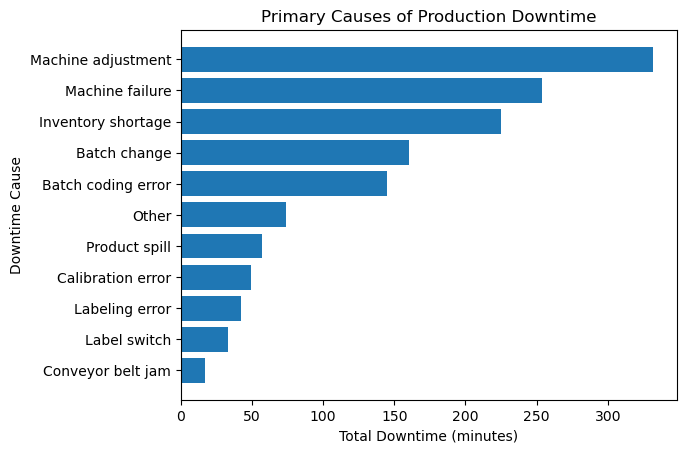

In [99]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(
    downtime_causes["Description"],
    downtime_causes["Downtime_Minutes"]
)
plt.xlabel("Total Downtime (minutes)")
plt.ylabel("Downtime Cause")
plt.title("Primary Causes of Production Downtime")
plt.gca().invert_yaxis()
plt.show()

In [97]:
operator_vs_non = (
    dtline
    .groupby("Operator Error", as_index=False)["Downtime_Minutes"]
    .sum()
)

operator_vs_non

,Operator Error,Downtime_Minutes
0,No,612.0
1,Yes,776.0


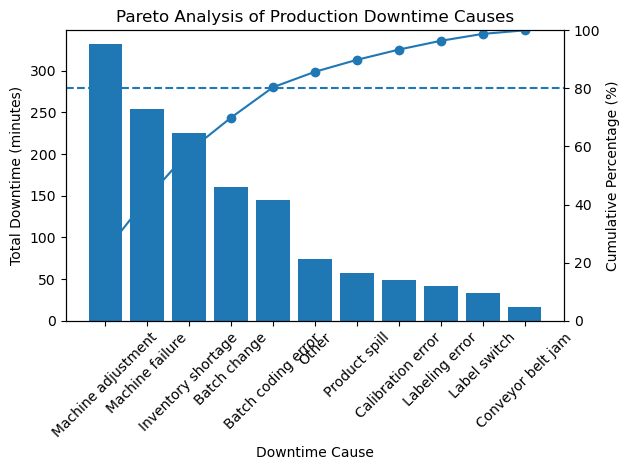

In [105]:
# Sort by downtime (descending)
downtime_causes = downtime_causes.sort_values(
    "Downtime_Minutes", ascending=False
)

# Cumulative percentage
downtime_causes["Cumulative_Pct"] = (
    downtime_causes["Downtime_Minutes"].cumsum()
    / downtime_causes["Downtime_Minutes"].sum()
) * 100

fig, ax1 = plt.subplots()

# Bar chart (downtime minutes)
ax1.bar(
    downtime_causes["Description"],
    downtime_causes["Downtime_Minutes"]
)
ax1.set_xlabel("Downtime Cause")
ax1.set_ylabel("Total Downtime (minutes)")
ax1.tick_params(axis="x", rotation=45)

# Second axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(
    downtime_causes["Description"],
    downtime_causes["Cumulative_Pct"],
    marker="o"
)
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 100)

# Optional 80% reference line
ax2.axhline(80, linestyle="--")

plt.title("Pareto Analysis of Production Downtime Causes")
plt.tight_layout()
plt.show()

### 4. Do specific operators face challenges with certain types of operational errors?

In [107]:
dtline = dtline.merge(
    df3[["Batch", "Operator"]],
    on="Batch",
    how="left"
)

dtline

,Batch,Factor,Downtime_Minutes,Description,Operator Error,Operator
0,422111,2,60.0,Batch change,Yes,Mac
1,422112,2,20.0,Batch change,Yes,Mac
2,422113,2,50.0,Batch change,Yes,Mac
3,422117,2,10.0,Batch change,Yes,Charlie
4,422130,2,20.0,Batch change,Yes,Dee
...,...,...,...,...,...,...
56,422125,12,10.0,Other,No,Charlie
57,422129,12,15.0,Other,No,Charlie
58,422135,12,15.0,Other,No,Mac
59,422141,12,7.0,Other,No,NaN


In [111]:
operator_errors = dtline[dtline["Operator Error"] == "Yes"]

In [119]:
operator_error_summary = (
    operator_errors
    .groupby(["Operator", "Description"], as_index=False)["Downtime_Minutes"]
    .sum()
    .sort_values("Downtime_Minutes", ascending=False)
)

In [121]:
operator_error_summary

,Operator,Description,Downtime_Minutes
14,Mac,Batch change,130.0
4,Charlie,Machine adjustment,118.0
12,Dennis,Machine adjustment,50.0
15,Mac,Batch coding error,47.0
1,Charlie,Batch coding error,44.0
2,Charlie,Calibration error,24.0
11,Dennis,Batch coding error,24.0
5,Charlie,Product spill,22.0
13,Dennis,Product spill,20.0
6,Dee,Batch change,20.0


In [123]:
operator_error_pivot = operator_error_summary.pivot(
    index="Operator",
    columns="Description",
    values="Downtime_Minutes"
).fillna(0)

C:\Users\User\AppData\Local\Temp\ipykernel_20208\1651202059.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0)


In [125]:
operator_error_pivot

Description,Batch change,Batch coding error,Calibration error,Label switch,Machine adjustment,Product spill
Operator,,,,,,
Charlie,10.0,44.0,24.0,10.0,118.0,22.0
Dee,20.0,0.0,10.0,10.0,14.0,15.0
Dennis,0.0,24.0,0.0,0.0,50.0,20.0
Mac,130.0,47.0,0.0,0.0,15.0,0.0


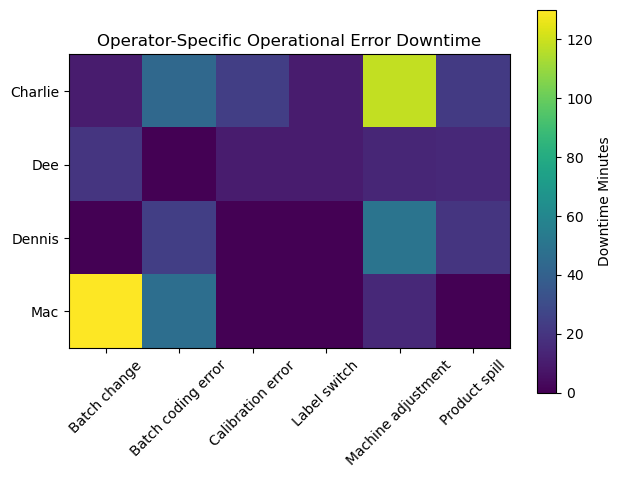

In [127]:
plt.figure()
plt.imshow(operator_error_pivot)
plt.colorbar(label="Downtime Minutes")

plt.xticks(
    range(len(operator_error_pivot.columns)),
    operator_error_pivot.columns,
    rotation=45
)
plt.yticks(
    range(len(operator_error_pivot.index)),
    operator_error_pivot.index
)

plt.title("Operator-Specific Operational Error Downtime")
plt.tight_layout()
plt.show()